In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
telco = pd.read_csv('telco_cust - paste 1CustDetails.csv', index_col=0)

In [4]:
telco.head()

,gender,is_senior_citizen,partner,dependents,partner_dependents,service_type,phone_service,phone_service_description,internet_service,internet_service_description,...,total_charges,tenure_charges,validate_tenure,churn,tenure_months,start_date,is_female,has_churned,has_phone,has_internet
customer_id,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,Female,0,Yes,Yes,3,3,1,One Line,1,DSL,...,593.30,593.30,True,No,9,11/19/2019,True,False,True,True
0003-MKNFE,Male,0,No,No,0,3,2,Two or More Lines,1,DSL,...,542.40,542.40,True,No,9,11/19/2019,False,False,True,True
0004-TLHLJ,Male,0,No,No,0,3,1,One Line,2,Fiber Optic,...,280.85,280.85,True,Yes,4,5/19/2020,False,True,True,True
0011-IGKFF,Male,1,Yes,No,1,3,1,One Line,2,Fiber Optic,...,1237.85,1237.85,True,Yes,13,8/19/2019,False,True,True,True
0013-EXCHZ,Female,1,Yes,No,1,3,1,One Line,2,Fiber Optic,...,267.40,267.40,True,Yes,3,5/19/2020,True,True,True,True


In [5]:
# notes
# partner_dependents: 0 = single, 1=spouse, 2=kids, 3=family
# service_type: 1=only phone, 2=only internet, 3=both
# churn: No or False = still customer, Yes or True = no longer customer
type(telco)

pandas.core.frame.DataFrame

In [6]:
telco.describe()

,is_senior_citizen,partner_dependents,service_type,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure_charges,tenure_months
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000
mean,0.162147,1.082209,2.469828,1.325004,1.222916,0.690473,64.761692,2283.300441,2279.734304,32.368309
std,0.368612,1.226274,0.826150,0.642730,0.778877,0.833755,30.090047,2266.771362,2266.794470,24.597021
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,35.500000,401.450000,398.550000,9.000000
50%,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,70.350000,1397.475000,1394.550000,29.000000
75%,0.000000,2.000000,3.000000,2.000000,2.000000,1.000000,89.850000,3794.737500,3786.600000,55.000000
max,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,118.750000,8684.800000,8684.800000,79.000000


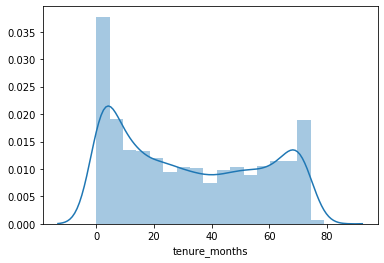

In [7]:
sns.distplot(telco.tenure_months)

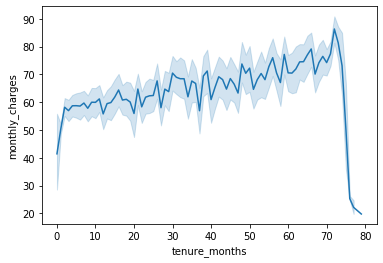

In [8]:
sns.lineplot(x='tenure_months', y='monthly_charges', data=telco)

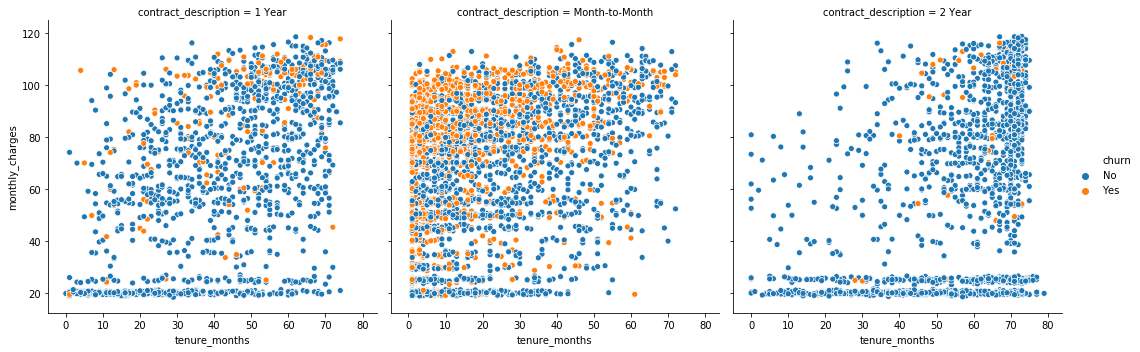

In [9]:
contract_churn = sns.relplot(x='tenure_months', y='monthly_charges', data=telco, col='contract_description', hue='churn')
contract_churn

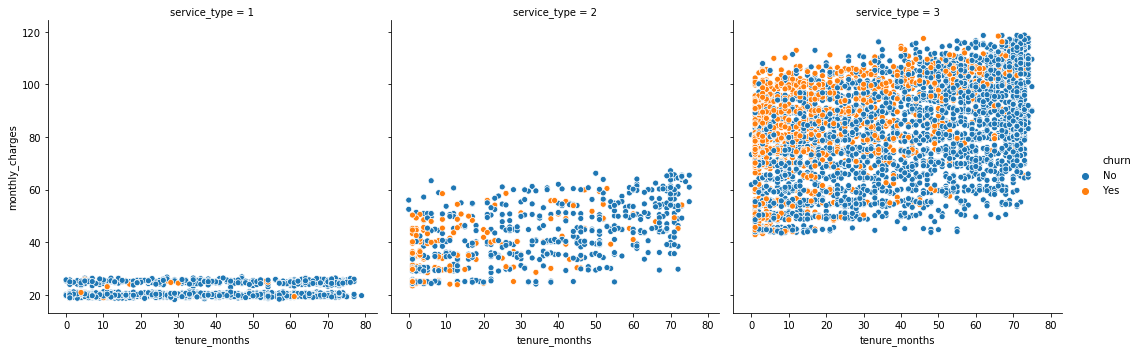

In [10]:
plan_churn = sns.relplot(x='tenure_months', y='monthly_charges', data=telco, col='service_type', hue='churn')

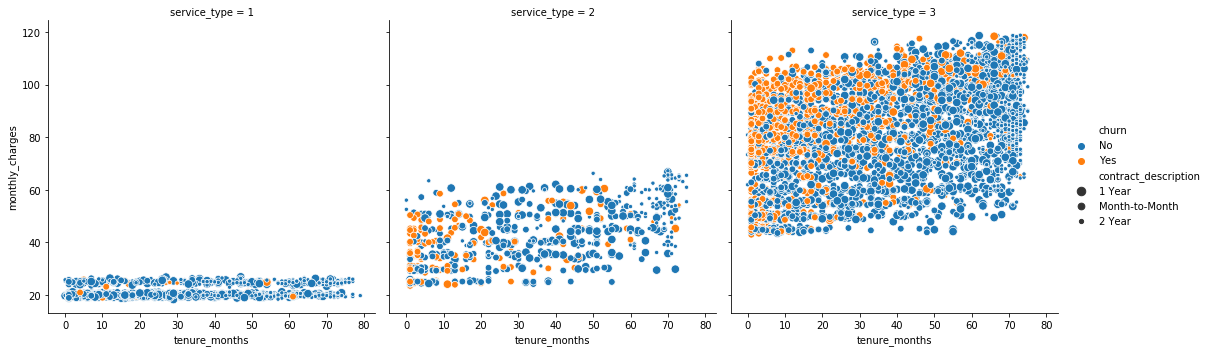

In [11]:
sns.relplot(x='tenure_months', y='monthly_charges', data=telco, col='service_type', hue='churn', size='contract_description')

In [12]:
# student_df.drop(columns=['Country', 'Region']).head(3)
telco2 = telco.drop(columns=['gender', 'is_senior_citizen', 'partner', 'dependents', 'partner_dependents'])
telco2

,service_type,phone_service,phone_service_description,internet_service,internet_service_description,contract_type,contract_description,payment_type,monthly_charges,total_charges,tenure_charges,validate_tenure,churn,tenure_months,start_date,is_female,has_churned,has_phone,has_internet
customer_id,,,,,,,,,,,,,,,,,,,
0002-ORFBO,3,1,One Line,1,DSL,1,1 Year,Mailed check,65.60,593.30,593.30,True,No,9,11/19/2019,True,False,True,True
0003-MKNFE,3,2,Two or More Lines,1,DSL,0,Month-to-Month,Mailed check,59.90,542.40,542.40,True,No,9,11/19/2019,False,False,True,True
0004-TLHLJ,3,1,One Line,2,Fiber Optic,0,Month-to-Month,Electronic check,73.90,280.85,280.85,True,Yes,4,5/19/2020,False,True,True,True
0011-IGKFF,3,1,One Line,2,Fiber Optic,0,Month-to-Month,Electronic check,98.00,1237.85,1237.85,True,Yes,13,8/19/2019,False,True,True,True
0013-EXCHZ,3,1,One Line,2,Fiber Optic,0,Month-to-Month,Mailed check,83.90,267.40,267.40,True,Yes,3,5/19/2020,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987-LUTYD,3,1,One Line,1,DSL,1,1 Year,Mailed check,55.15,742.90,742.90,True,No,13,7/19/2019,True,False,True,True
9992-RRAMN,3,2,Two or More Lines,2,Fiber Optic,0,Month-to-Month,Electronic check,85.10,1873.70,1873.70,True,Yes,22,10/19/2018,False,True,True,True
9992-UJOEL,3,1,One Line,1,DSL,0,Month-to-Month,Mailed check,50.30,92.75,92.75,True,No,2,7/19/2020,False,False,True,True


In [13]:
telco2 = telco2.drop(columns=['tenure_charges', 'validate_tenure', 'is_female', 'has_phone', 'has_internet'])
telco2.head()

,service_type,phone_service,phone_service_description,internet_service,internet_service_description,contract_type,contract_description,payment_type,monthly_charges,total_charges,churn,tenure_months,start_date,has_churned
customer_id,,,,,,,,,,,,,,
0002-ORFBO,3,1,One Line,1,DSL,1,1 Year,Mailed check,65.6,593.30,No,9,11/19/2019,False
0003-MKNFE,3,2,Two or More Lines,1,DSL,0,Month-to-Month,Mailed check,59.9,542.40,No,9,11/19/2019,False
0004-TLHLJ,3,1,One Line,2,Fiber Optic,0,Month-to-Month,Electronic check,73.9,280.85,Yes,4,5/19/2020,True
0011-IGKFF,3,1,One Line,2,Fiber Optic,0,Month-to-Month,Electronic check,98.0,1237.85,Yes,13,8/19/2019,True
0013-EXCHZ,3,1,One Line,2,Fiber Optic,0,Month-to-Month,Mailed check,83.9,267.40,Yes,3,5/19/2020,True


In [14]:
plan3 = telco2.sort_values(by='service_type')
plan3

,service_type,phone_service,phone_service_description,internet_service,internet_service_description,contract_type,contract_description,payment_type,monthly_charges,total_charges,churn,tenure_months,start_date,has_churned
customer_id,,,,,,,,,,,,,,
1383-EZRWL,1,1,One Line,0,No Internet Service,0,Month-to-Month,Mailed check,20.05,164.85,Yes,8,12/19/2019,True
7850-THJMU,1,1,One Line,0,No Internet Service,2,2 Year,Credit card (automatic),19.65,494.90,No,25,7/19/2018,False
7115-IRDHS,1,2,Two or More Lines,0,No Internet Service,2,2 Year,Bank transfer (automatic),24.65,1830.05,No,74,6/19/2014,False
8946-BFWSG,1,2,Two or More Lines,0,No Internet Service,2,2 Year,Mailed check,25.25,1573.05,No,62,6/19/2015,False
1539-LNKHM,1,1,One Line,0,No Internet Service,0,Month-to-Month,Mailed check,20.40,266.60,No,13,7/19/2019,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969-JQABI,3,1,One Line,1,DSL,0,Month-to-Month,Credit card (automatic),65.25,3791.60,No,58,10/19/2015,False
3969-GYXEL,3,1,One Line,2,Fiber Optic,0,Month-to-Month,Electronic check,76.40,838.70,No,11,10/19/2019,False
3967-KXAPS,3,2,Two or More Lines,1,DSL,2,2 Year,Credit card (automatic),92.30,6719.90,No,73,8/19/2014,False


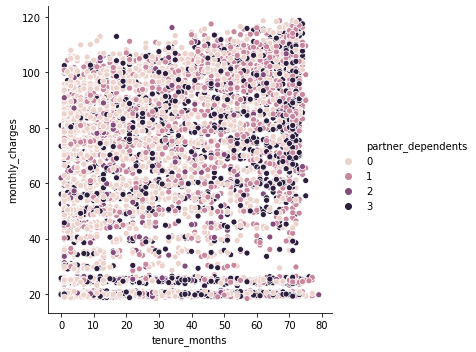

In [15]:
sns.relplot(x='tenure_months', y='monthly_charges', data=telco, hue='partner_dependents')

In [16]:
# data = pd.crosstab(tips.time, tips['size'])
# sns.heatmap(data, annot=True, cmap=plt.cm.Greens)
# data

gender = pd.crosstab(telco.gender, telco['service_type'])
gender


service_type,1,2,3
gender,,,
Female,747,331,2410
Male,779,351,2425


In [17]:
senior = pd.crosstab(telco.is_senior_citizen, telco['service_type'])
senior


service_type,1,2,3
is_senior_citizen,,,
0,1474,578,3849
1,52,104,986


In [18]:
# what is the percentage of customers that are seniors for each plan?
# straight math
sen_plan1 = 52/(52+1474) * 100
sen_plan2 = 104/(578+104) * 100
sen_plan3 = 986/(3849+986) * 100
total_senior = (52+104+986)/(1474+578+3849)*100

print('% senior plan 1 =', sen_plan1)
print('% senior plan 2 =', sen_plan2)
print('% senior plan 3 =', sen_plan3)
print('the % of customers that are seniors is', total_senior)

% senior plan 1 = 3.4076015727391877
% senior plan 2 = 15.249266862170089
% senior plan 3 = 20.392967942088937
the % of customers that are seniors is 19.352652092865615


In [19]:
# what is the average cost by service_type?
avg_service_cost = telco.groupby('service_type').mean()
avg_service_cost


,is_senior_citizen,partner_dependents,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure_charges,validate_tenure,tenure_months,is_female,has_churned,has_phone,has_internet
service_type,,,,,,,,,,,,,,
1,0.034076,1.326343,1.224115,0.000000,1.074705,21.079194,665.220329,662.604784,1.0,30.563565,0.489515,0.074050,1.0,0.0
2,0.152493,1.060117,0.000000,1.000000,0.684751,42.028592,1500.433750,1496.033651,1.0,31.737537,0.485337,0.249267,0.0,1.0
3,0.203930,1.008273,1.543744,1.640331,0.570010,81.755171,2902.470788,2900.669876,1.0,33.026887,0.498449,0.328025,1.0,1.0


In [20]:
partner_depend = pd.crosstab(telco.partner_dependents, telco['service_type'])
partner_depend



service_type,1,2,3
partner_dependents,,,
0,671,327,2282
1,212,149,1292
2,117,44,200
3,526,162,1061


## NOTE: the average cost of phone alone and internet alone adds to 63, but the average combined plan is 82

In [21]:
seniors = telco.groupby(['is_senior_citizen', 'service_type', 'partner_dependents']).count()
seniors

gender  partner  \
is_senior_citizen service_type partner_dependents                    
0                 1            0                      646      646   
                               1                      188      188   
                               2                      117      117   
                               3                      523      523   
                  2            0                      274      274   
                               1                      107      107   
                               2                       44       44   
                               3                      153      153   
                  3            0                     1799     1799   
                               1                      868      868   
                               2                      192      192   
                               3                      990      990   
1                 1            0                       25       25   
                               1                       24       24   
                               3                        3        3   
                  2            0                       53       53   
                               1                       42       42   
                               3                        9        9   
                  3            0                      483      483   
                               1                      424      424   
                               2                        8        8   
                               3                       71       71   

                                                   dependents  phone_service  \
is_senior_citizen service_type partner_dependents                              
0                 1            0                          646            646   
                               1                          188            188   
                               2                          117            117   
                               3                          523            523   
                  2            0                          274            274   
                               1                          107            107   
                               2                           44             44   
                               3                          153            153   
                  3            0                         1799           1799   
                               1                          868            868   
                               2                          192            192   
                               3                          990            990   
1                 1            0                           25             25   
                               1                           24             24   
                               3                            3              3   
                  2            0                           53             53   
                               1                           42             42   
                               3                            9              9   
                  3            0                          483            483   
                               1                          424            424   
                               2                            8              8   
                               3                           71             71   

                                                   phone_service_description  \
is_senior_citizen service_type partner_dependents                              
0                 1            0                                         646   
                               1                                         188   
                               2                                         117   
                               3                 

In [22]:
# student_df.groupby(['Gender', 'Handed']).size()
# sns.relplot(x='total_bill', y='tip', data=tips)
# student_df.groupby(['Gender', 'Handed']).Ageyears.agg(['mean', 'median'])
# student_df.groupby(['Gender', 'Handed']).agg({'Ageyears': 'mean', 'Text_Messages_Sent_Yesterday': 'median'})
seniors_churn = telco.groupby(['is_senior_citizen', 'service_type', 'partner_dependents']).agg({'tenure_months': 'mean', 'has_churned': 'count'})
seniors_churn


tenure_months  has_churned
is_senior_citizen service_type partner_dependents                            
0                 1            0                       21.496904          646
                               1                       45.377660          188
                               2                       24.222222          117
                               3                       36.822180          523
                  2            0                       24.748175          274
                               1                       40.299065          107
                               2                       23.613636           44
                               3                       40.849673          153
                  3            0                       23.175653         1799
                               1                       43.711982          868
                               2                       23.739583          192
                               3                       43.325253          990
1                 1            0                       33.160000           25
                               1                       46.125000           24
                               3                       64.666667            3
                  2            0                       24.415094           53
                               1                       39.357143           42
                               3                       35.111111            9
                  3            0                       24.701863          483
                               1                       40.370283          424
                               2                       22.250000            8
                               3                       47.521127           71

In [25]:

telco6 = pd.read_csv('Telco charts - Sheet6.csv', index_col=0)

In [26]:
telco6

,rev_10_reduct,rev_20_reduct,rev_30_reduct,rev_40_reduct,rev_50_reduct,cost_10_reduct,cost_20_reduct,cost_30_reduct,cost_40_reduct,cost_50_reduct
tenure,,,,,,,,,,
1,8548.50682,10964.06364,13379.62046,15795.17728,18210.73410,77175.0,64890,52605.0,40320,28035.0
2,10105.92222,11225.89444,12345.86666,13465.83888,14585.81109,27058.5,21672,16285.5,10899,5512.5
3,13472.63379,14323.11758,15173.60138,16024.08517,16874.56896,18522.0,14364,10206.0,6048,1890.0
4,13473.62387,14275.04773,15076.47160,15877.89546,16679.31933,18963.0,15246,11529.0,7812,4095.0
5,15590.96516,16260.33033,16929.69549,17599.06066,18268.42582,14521.5,11403,8284.5,5166,2047.5
6,14476.67798,14947.95596,15419.23394,15890.51191,16361.78989,8820.0,6615,4410.0,2205,0.0
7,21543.16914,22192.93829,22842.70743,23492.47657,24142.24571,11970.0,9135,6300.0,3465,630.0
8,24908.94628,25464.74255,26020.53883,26576.33511,26754.73885,8473.5,5922,3370.5,819,0.0
9,34112.52716,34726.10432,35339.68148,35953.25865,36078.76306,8883.0,6111,3339.0,567,0.0


In [ ]:
# # plot all subjects reaction times by day
# plt.figure(figsize=(16, 9)) # increase figure size
# palette = sns.color_palette("husl", 18) # set color pallet
# # plot line of average change
# plt.plot(avg_change.index, avg_change.Reaction, linewidth=10, label='avg_change', c='green', linestyle="-.")
# plt.legend('avg_change')
# # plot all lines
# sns.lineplot(x='Days', y='Reaction', data=sleepstudy, hue='Subject', legend='full', palette=palette)
# # shift legend to outside graph
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
# # library
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
 
# # Data
# x=range(1,6)
# y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
 
# # Plot
# plt.stackplot(x,y, labels=['A','B','C'])
# plt.legend(loc='upper left')
# plt.show()



In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(x='tenure')